### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import the data

In [2]:
data=pd.read_csv('C:/Users/SREEJA/Desktop/car_data.txt')

In [3]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns=col_names

In [5]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Data information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
for i in data.columns:
    print(data[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [8]:
data['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
data.shape

(1727, 7)

In [10]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
data.duplicated().sum()

0

### Splitting of data into training and testing

In [13]:
X=data.drop(['class'],axis=1)
y=data['class']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [16]:
X_train.shape,X_test.shape

((1208, 6), (519, 6))

### Encoding

In [17]:
import category_encoders as ce

In [18]:
encoder=ce.OrdinalEncoder(cols=['buying','maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1653,1,1,1,1,1,1
120,2,2,2,2,2,1
1641,1,1,2,3,2,1
22,2,3,2,3,2,2
1006,3,2,1,1,1,2


### Random Forest Classifier with default parameters

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc=RandomForestClassifier()

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred=rfc.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print("accuracy score: ",accuracy_score(y_test,y_pred))

accuracy score:  0.905587668593449


In [29]:
rfc_100=RandomForestClassifier(n_estimators=100)
rfc_100.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred=rfc_100.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred))

accuracy score:  0.9132947976878613


### Visualizing feature scores

In [32]:
feature_scores=pd.Series(rfc_100.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [33]:
feature_scores

safety      0.278563
persons     0.231189
buying      0.173798
maint       0.160873
lug_boot    0.083716
doors       0.071861
dtype: float64

In [35]:
import seaborn as sns

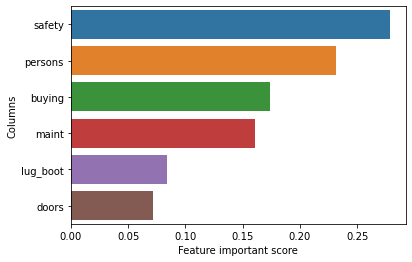

In [46]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel("Feature important score")
plt.ylabel("Columns")
plt.show()

In [47]:
X=data.drop(['class','doors'],axis=1)
y=data['class']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [49]:
X_train.head()

,buying,maint,persons,lug_boot,safety
191,vhigh,high,2,med,low
883,med,vhigh,more,small,high
559,high,high,more,small,high
270,vhigh,med,2,small,med
980,med,high,4,small,low


In [51]:

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot','safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [52]:
clf=RandomForestClassifier()

In [53]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,y_pred))

Accuracy score :  0.9421965317919075
